### Nome: Ramon Gomes Paulino, RA: 250504

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1) Considere a equação:

    cos(x) + 1/(1 + e−2x) = 0
    
</br>(a) Identifique graficamente a menor raiz positiva dessa equação.
</br>(b) Complete a Tabela (1) aplicando os métodos numéricos com tolerâncias ε = τ = 10−5.
</br>(c) Compare os diversos métodos considerando a garantia e rapidez de convergência e eficiência computacional.

In [22]:
def f1(x):
    return np.cos(x) + 1/(1 + np.exp(-2*x))

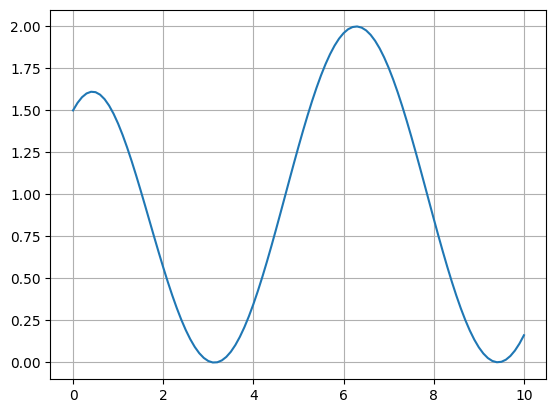

-0.0011604706623293826

In [26]:
a = 0
b = 10
x1 = np.linspace(a,b,num=101)
plt.plot(x1, f1(x1))
plt.grid()
plt.show()
f1(3.1)

a) Graficamente, aparentemente a menor raiz positiva está próximo do valor 3.1, o que se comprova aplicando f(3.1) = -0.001160

b) Complete a Tabela (1) aplicando os métodos numéricos com tolerâncias ε = τ = 10−5

In [46]:
def f1(x):
    return np.cos(x) + 1/(1 + np.exp(-2*x))

def bisseccao(f, a, b, tol=1e-5, it_max=100):
    if f(a) * f(b) >= 0:
        print("O método da bissecção não pode ser aplicado.")
        return None
    iteracoes = 0
    xt = []
    while (b - a) / 2 > tol and iteracoes < it_max:
        m = (a + b) / 2
        xt.append(m)
        if f(m) == 0:
            return m,f(m), iteracoes
        elif f(a) * f(m) < 0:
            b = m
        else:
            a = m
        iteracoes += 1
    return m, f(m), iteracoes, xt

def posicao_falsa(f, a, b, tol=1e-5, it_max=100):
    if f(a) * f(b) >= 0:
        print("O método da posição falsa não pode ser aplicado.")
        return None
    iteracoes = 0
    xt = []
    while iteracoes < it_max:
        m = (a * f(b) - b * f(a)) / (f(b) - f(a))
        xt.append(m)
        if abs(f(m)) < tol or abs(b - a) < tol:
            break
        if f(m) * f(a) < 0:
            b = m
        else:
            a = m
        iteracoes += 1
    return m, f(m), iteracoes, xt

def ponto_fixo(phi, x0, tol=1e-5, it_max=100):
    iteracoes = 0
    xt = [x0]
    while iteracoes < it_max:
        xt.append(phi(x0))
        if abs(xt[-1] - xt[-2]) < tol:
            break
        iteracoes += 1
    return xt[-1], f1(xt[-1]), iteracoes, xt

def newton(f, df, x0, tol=1e-5, it_max=100):
    iteracoes = 0
    xt = [x0]
    while iteracoes < it_max:
        xt.append(x0 - f(x0) / df(x0))
        if abs(xt[-1] - xt[-2]) < tol:
            break
        iteracoes += 1
    return xt[-1], f1(xt[-1]), iteracoes, xt

def secante(f, x0, x1, tol=1e-5, it_max=100):
    iteracoes = 0
    xt = [x0,x1]
    while iteracoes < it_max:
        xt.append(xt[-1] - f(xt[-1]) * (xt[-1] - xt[-2]) / (f(xt[-1]) - f(xt[-2])))
        if abs(xt[-1] - xt[-2]) < tol:
            break
        iteracoes += 1
    return xt[-1], f1(xt[-1]), iteracoes, xt

In [49]:
phi1 = lambda x: np.arccos(-1/(1 + np.exp(-2*x)))
df1 = lambda x: -np.sin(x) + (2 * np.exp(-2*x)) / ((1 + np.exp(-2*x))**2)
a = 3.1
b = 4
it_max = 100
x0 = 3.1
x1 = 4
tol = 1e-5
raiz_bisseccao,fun_raiz_bisseccao, it_bisseccao, xt_bisseccao = bisseccao( f1, a, b, tol, it_max)
raiz_posicao_falsa,fun_raiz_posicao_falsa, it_posicao_falsa, xt_posicao_falsa = posicao_falsa(f1, a, b, tol,it_max)
raiz_ponto_fixo,fun_raiz_ponto_fixo, it_ponto_fixo, xt_ponto_fixo = ponto_fixo(phi1, x0, tol, it_max)
raiz_newton,fun_raiz_newton, it_newton, xt_newton = newton(f1, df1, x0, tol, it_max)
raiz_secante, fun_raiz_secante, it_secante, xt_secante = secante(f1, x0, x1, tol, it_max)

print(f"\n Raiz pelo método da Bissecção: \n {raiz_bisseccao}, \n f(xt) = {fun_raiz_bisseccao}, \n iterações: {it_bisseccao} \n xt = {xt_bisseccao}")
print(f"\n Raiz pelo método da Posição Falsa: \n {raiz_posicao_falsa}, \n f(xt) = {fun_raiz_posicao_falsa}, \n iterações: {it_posicao_falsa} \n xt = {xt_posicao_falsa}")
print(f"\n Raiz pelo método do Ponto Fixo: \n {raiz_ponto_fixo}, \n f(xt) = {fun_raiz_ponto_fixo}, \n iterações: {it_ponto_fixo} \n xt = {xt_ponto_fixo}")
print(f"\n Raiz pelo método de Newton: \n {raiz_newton}, \n f(xt) = {fun_raiz_newton}, \n iterações: {it_newton} \n xt = {xt_newton}")
print(f"\n Raiz pelo método da Secante: \n {raiz_secante}, \n f(xt) = {fun_raiz_secante}, \n iterações: {it_secante} \n xt = {xt_secante}")


 Raiz pelo método da Bissecção: 
 3.199247741699219, 
 f(xt) = 2.9973613591138815e-07, 
 iterações: 16 
 xt = [3.55, 3.325, 3.2125000000000004, 3.15625, 3.184375, 3.1984375000000003, 3.2054687500000005, 3.201953125, 3.2001953125, 3.1993164062500004, 3.1988769531250005, 3.1990966796875004, 3.19920654296875, 3.1992614746093753, 3.1992340087890625, 3.199247741699219]

 Raiz pelo método da Posição Falsa: 
 3.199099888860102, 
 f(xt) = -8.69960868310482e-06, 
 iterações: 53 
 xt = [3.1030082927722082, 3.106285679300494, 3.109827739532112, 3.1136228330823843, 3.1176514566920415, 3.1218860147322545, 3.126291105662524, 3.130824382322108, 3.1354379796303498, 3.1400804289135125, 3.144698907388881, 3.149241619305685, 3.1536600838329827, 3.1579111191726033, 3.1619583592228757, 3.165773207650437, 3.1693352096465874, 3.1726318894817642, 3.175658151717413, 3.178415370854845, 3.180910299134734, 3.1831539099203043, 3.1851602711347127, 3.1869455159638256, 3.188526951499894, 3.1899223233800993, 3.191149

|            Dado                                              | Bissecção              |  Pos. falsa           |               Ponto Fixo          |  Newton                                            |  Secante              |
| :----------------------------------------------------------: | :--------------------: | :-------------------: | :-------------------------------: | :------------------------------------------------: | :-------------------: |
|           phi ou f'                                          |     ---                |      ---              | phi = arccos(-1/(1 + exp(-2*x)))  |  f'(x)= -sin(x)+(2*exp(-2*x))/((1 + exp(-2*x))**2) |     ---               |
|Dados iniciais: X0 ou [a,b]                                   |  [3.1, 4]              |  [3.1, 4]             |         3.1                       |   3.1                                              |     3.1               |
|Aproximação da Raiz: xt                                       | 3.199247741699219      |  3.199099888860102    |      3.076421580895186            |                   3.0764211637804437               | 3.0764211857530346    |
|Valor de f na aproximação f(xt)                               | 2.9973613591138815e-07 | -8.69960868310482e-06 |      -2.5396679759204233e-08      |                   7.498446308318307e-13            | -1.3371294071973239e-09   |
|Majorante do erro ou dif. entre duas iterações consecutivas:  |        ---             |  ---                  |   -------                         |   ---                                              |     ---               |
|Numero de iterações                                           |         16             |  53                   |         3                         |     3                                              |      6                |